Este cuaderno incluye el código para el procesamiento básico de imágenes: obtención y manejo de los histogramas, así como el cálculo de las derivadas.

# Módulos

In [11]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Procesamiento de imágenes

## Matriz de escala de grises

In [12]:
# Ruta a la imagen JPG
image_path = "Cotopaxi.jpg"

# Cargar la imagen
image = Image.open(image_path)

# Convertir la imagen a escala de grises
image_gray = image.convert("L")
data_matrix_gray = np.array(image_gray)

## Histograma

C:\Users\matda\AppData\Local\Temp\ipykernel_10512\3665314022.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pd.DataFrame(data_matrix_gray).to_latex(index=False, header=False, escape=False)


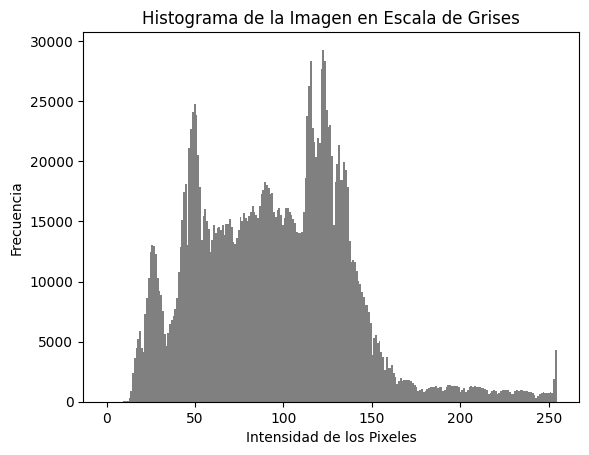

In [13]:
# get in latex form for easy copy-paste
pd.DataFrame(data_matrix_gray).to_latex(index=False, header=False, escape=False)

# Calcular el histograma
histogram, bins = np.histogram(data_matrix_gray, bins=256, range=(0, 255))

# Graficar el histograma
plt.figure()
plt.bar(bins[:-1], histogram, width=1, color='gray')
plt.title("Histograma de la Imagen en Escala de Grises")
plt.xlabel("Intensidad de los Pixeles")
plt.ylabel("Frecuencia")
plt.show()

In [14]:
# Determinar el máximo valor de frecuencia
max_frequency = np.max(histogram)
print("Máximo valor de frecuencia:", max_frequency)

Máximo valor de frecuencia: 29288


## Función de distribución acumulada

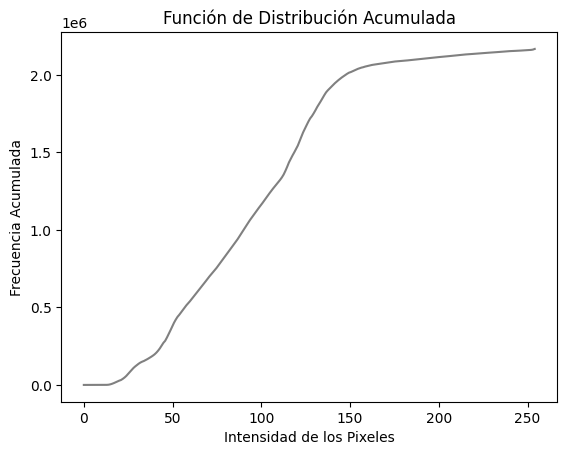

In [15]:
# Obtenemos la gráfica de la función de distribución acumulada
cdf = np.cumsum(histogram)

# Graficar la función de distribución acumulada
plt.figure()
plt.plot(bins[:-1], cdf, color='gray')
plt.title("Función de Distribución Acumulada")
plt.xlabel("Intensidad de los Pixeles")
plt.ylabel("Frecuencia Acumulada")
plt.show()


## Ecualización de histograma

In [16]:
# Calcular la función de distribución acumulada normalizada
cdf_normalized = cdf / cdf[-1]

# Crear un diccionario para mapear los valores de intensidad de los pixeles
mapping = {}

for i in range(256):
    mapping[i] = np.round(255 * cdf_normalized[i])

# Crear una nueva imagen con el histograma ecualizado
data_matrix_eq = np.zeros_like(data_matrix_gray)

for i in range(data_matrix_gray.shape[0]):

    for j in range(data_matrix_gray.shape[1]):
        data_matrix_eq[i, j] = mapping[data_matrix_gray[i, j]]

# Convertir la matriz de datos a un objeto de imagen
image_eq = Image.fromarray(data_matrix_eq)

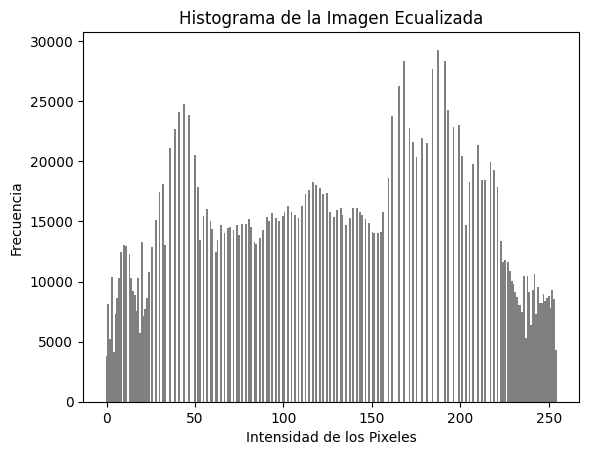

In [17]:
# Hacemos un gráfico del histograma de la imagen ecualizada
histogram_eq, bins_eq = np.histogram(data_matrix_eq, bins=256, range=(0, 255))

plt.figure()
plt.bar(bins_eq[:-1], histogram_eq, width=1, color='gray')
plt.title("Histograma de la Imagen Ecualizada")
plt.xlabel("Intensidad de los Pixeles")
plt.ylabel("Frecuencia")
plt.show()

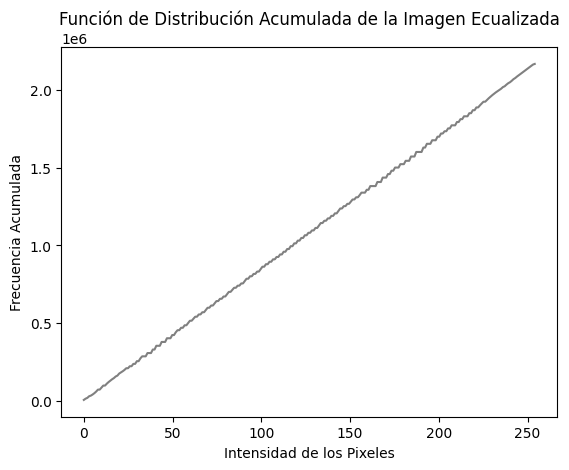

In [18]:
# Graficamos la función de distribución acumulada de la imagen ecualizada
cdf_eq = np.cumsum(histogram_eq)

plt.figure()
plt.plot(bins_eq[:-1], cdf_eq, color='gray')
plt.title("Función de Distribución Acumulada de la Imagen Ecualizada")
plt.xlabel("Intensidad de los Pixeles")
plt.ylabel("Frecuencia Acumulada")
plt.show()


## Primera derivada en x de la función

C:\Users\matda\AppData\Local\Temp\ipykernel_10512\3496438625.py:7: RuntimeWarning: overflow encountered in scalar subtract
  data_matrix_dx[i, j] = (data_matrix_gray[i, j + 1] - data_matrix_gray[i, j]) / dx
C:\Users\matda\AppData\Local\Temp\ipykernel_10512\3496438625.py:15: RuntimeWarning: overflow encountered in scalar subtract
  data_matrix_dy[i, j] = (data_matrix_gray[i + 1, j] - data_matrix_gray[i, j]) / dy


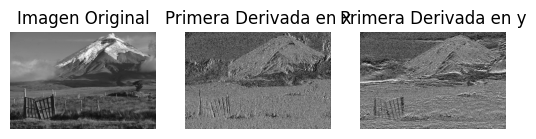

In [19]:
# Calculamos la primera derivada en x de la imagen original mediante diferencias finitas hacia adelante 
dx = 1
data_matrix_dx = np.zeros_like(data_matrix_gray)

for i in range(data_matrix_gray.shape[0]):
    for j in range(data_matrix_gray.shape[1] - 1):
        data_matrix_dx[i, j] = (data_matrix_gray[i, j + 1] - data_matrix_gray[i, j]) / dx

# Calculamos la primera derivada en y de la imagen original mediante diferencias finitas hacia adelante
dy = 1
data_matrix_dy = np.zeros_like(data_matrix_gray)

for i in range(data_matrix_gray.shape[0] - 1):
    for j in range(data_matrix_gray.shape[1]):
        data_matrix_dy[i, j] = (data_matrix_gray[i + 1, j] - data_matrix_gray[i, j]) / dy

# Mostramos la imagen original y sus derivadas
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(data_matrix_gray, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(data_matrix_dx, cmap='gray')
plt.title("Primera Derivada en x")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(data_matrix_dy, cmap='gray')
plt.title("Primera Derivada en y")
plt.axis("off")

plt.show()

# Guardamos las imagenes
image_dx = Image.fromarray(data_matrix_dx)
image_dx.save("Cotopaxi_dx.jpg")

image_dy = Image.fromarray(data_matrix_dy)
image_dy.save("Cotopaxi_dy.jpg")

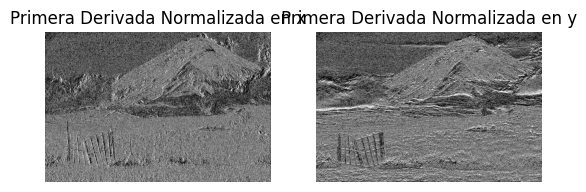

In [20]:
# Normalizamo las derivadas en x e y
data_matrix_dx_norm = np.abs(data_matrix_dx) / np.max(np.abs(data_matrix_dx))

data_matrix_dy_norm = np.abs(data_matrix_dy) / np.max(np.abs(data_matrix_dy))

# Mostramos las derivadas normalizadas

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(data_matrix_dx_norm, cmap='gray')
plt.title("Primera Derivada Normalizada en x")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(data_matrix_dy_norm, cmap='gray')
plt.title("Primera Derivada Normalizada en y")
plt.axis("off")

plt.show()